# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid' , {'axis.axisbelow' : False})
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from IPython import display

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load the Data

In [11]:
df = pd.read_csv('/content/drive/MyDrive/week 4 Night Solution/Datasets/Traffic_Accidents.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [12]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [14]:
df.shape

(52000, 30)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52000.0,52309.605596,30282.566278,0.000000,25924.750000,52285.500000,78552.250000,104949.000000
Location_Easting_OSGR,52000.0,439654.064615,66711.811588,296780.000000,388110.000000,429505.000000,516010.000000,559570.000000
Location_Northing_OSGR,52000.0,338794.330769,115731.113185,156110.000000,194160.000000,361950.000000,415952.500000,656390.000000
Longitude,52000.0,-1.425829,0.975537,-3.596752,-2.179555,-1.552874,-0.312861,0.350177
Latitude,52000.0,52.940991,1.044812,51.289060,51.630849,53.149640,53.638514,55.800830
Police_Force,52000.0,11.101904,9.558172,1.000000,1.000000,10.000000,20.000000,48.000000
Accident_Severity,52000.0,2.848481,0.390890,1.000000,3.000000,3.000000,3.000000,3.000000
Number_of_Vehicles,51198.0,1.843060,0.708149,1.000000,1.000000,2.000000,2.000000,18.000000
Number_of_Casualties,52000.0,1.358615,0.804162,1.000000,1.000000,1.000000,1.000000,23.000000
Day_of_Week,51463.0,4.120009,1.934134,1.000000,2.000000,4.000000,6.000000,7.000000


In [16]:
df.isnull().sum().sum()

2454

In [17]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [18]:
df.duplicated().sum()

0

In [19]:
for col in df.columns:
  print(f'\n{df[col].value_counts()}\n')


Unnamed: 0
88245    1
20624    1
65835    1
73564    1
36661    1
        ..
80980    1
67631    1
93152    1
40316    1
75359    1
Name: count, Length: 52000, dtype: int64


Accident_Index
2.01E+12         13022
200520G026802        1
200506P025749        1
200532C000405        1
200501TX20059        1
                 ...  
20053102A1000        1
200501QK50403        1
200501QA10185        1
200522EC31149        1
2005160D02810        1
Name: count, Length: 38979, dtype: int64


Location_Easting_OSGR
529000.0    19
530020.0    19
533650.0    18
530980.0    18
531190.0    18
            ..
311460.0     1
336090.0     1
462060.0     1
422590.0     1
509970.0     1
Name: count, Length: 17791, dtype: int64


Location_Northing_OSGR
181370.0    23
180950.0    20
181050.0    19
181190.0    18
177940.0    17
            ..
318050.0     1
458450.0     1
171210.0     1
581510.0     1
515740.0     1
Name: count, Length: 21409, dtype: int64


Longitude
-2.688772    6
-1.234393    6
-2.948071   

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

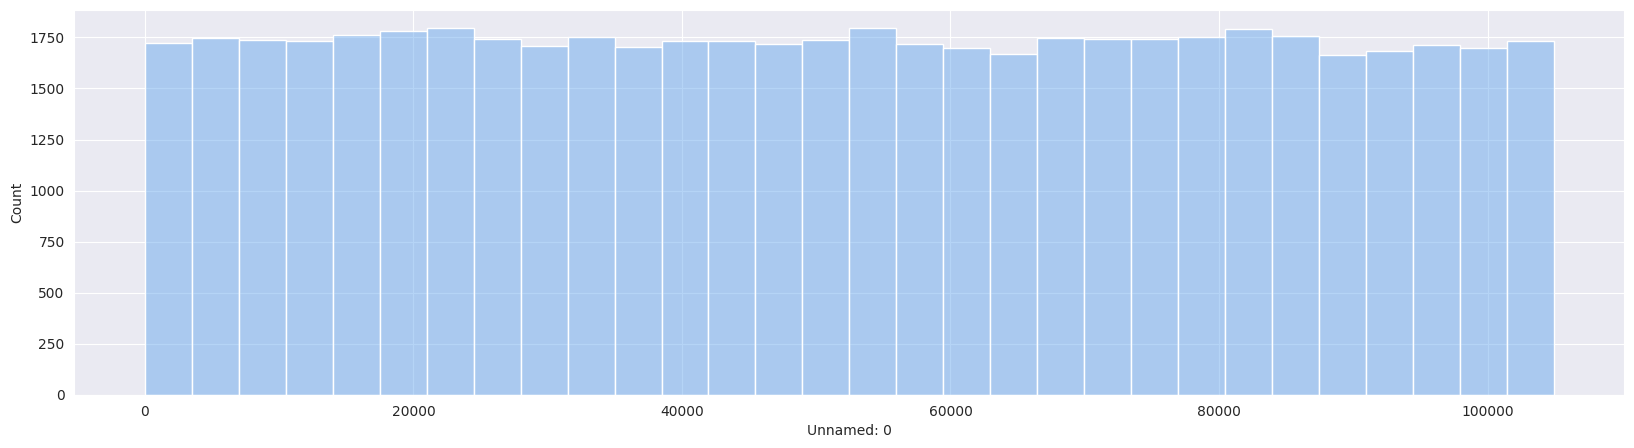

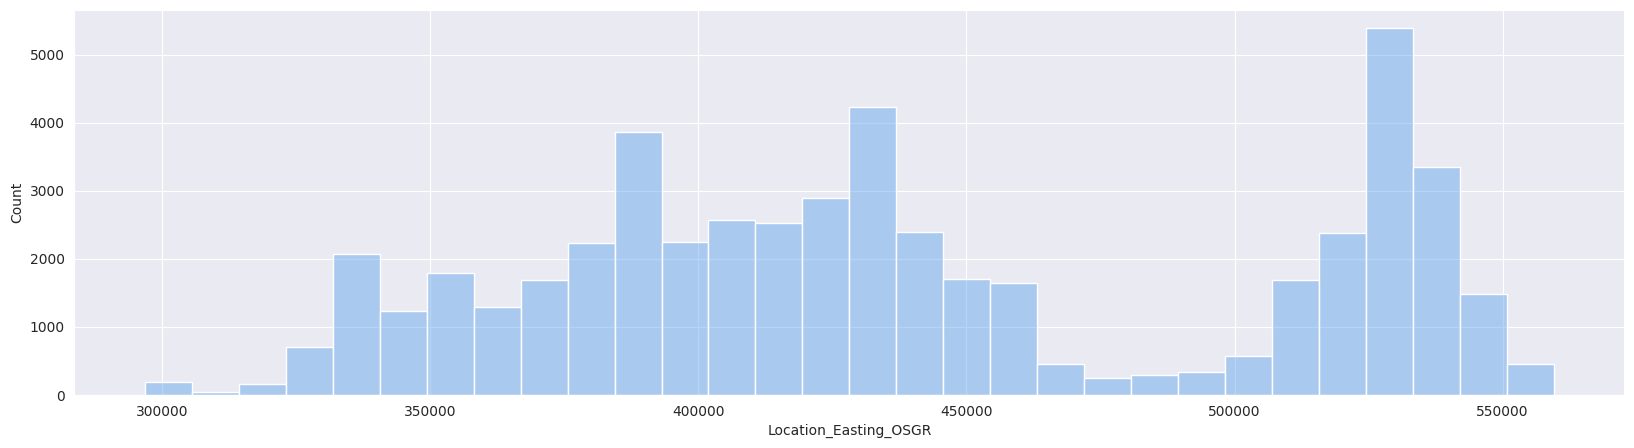

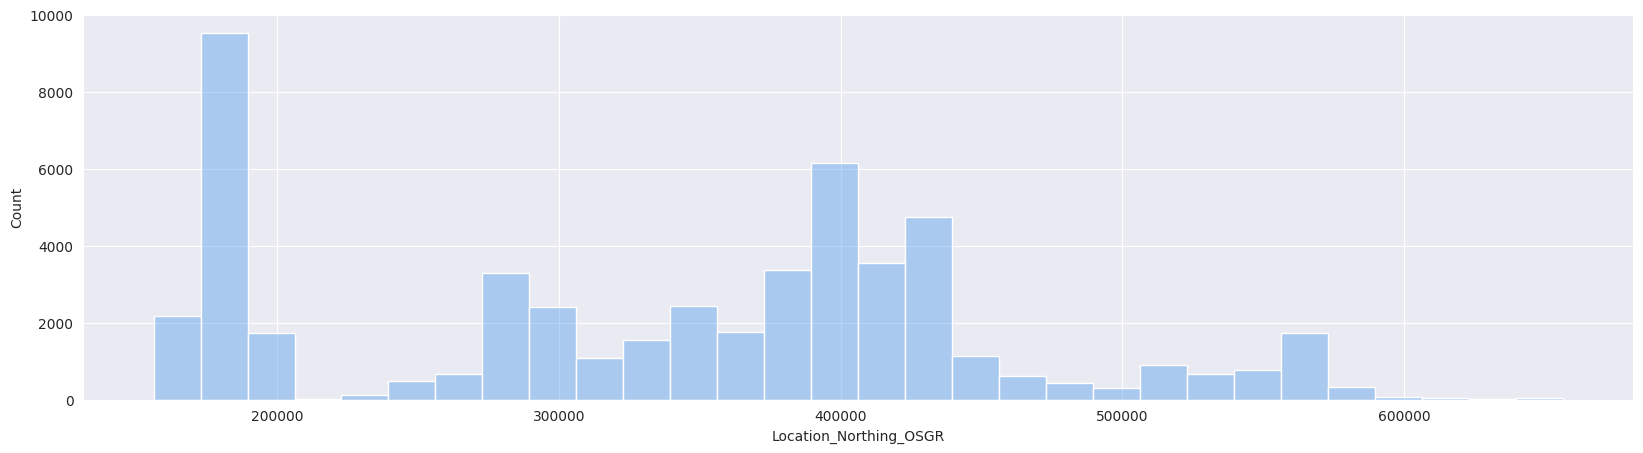

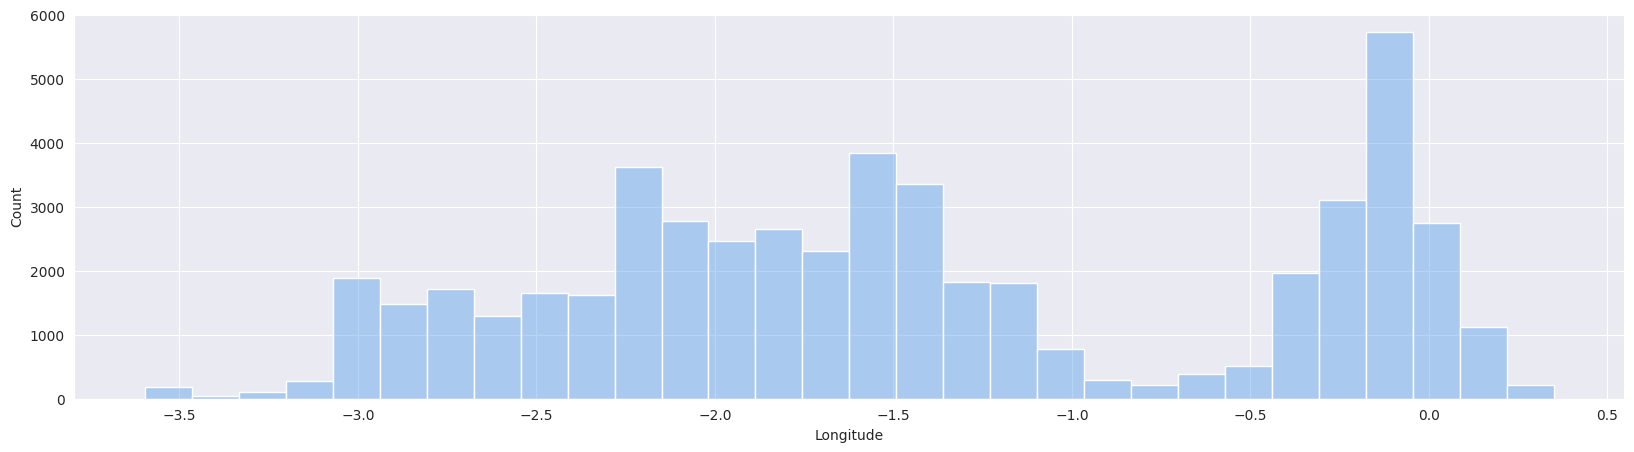

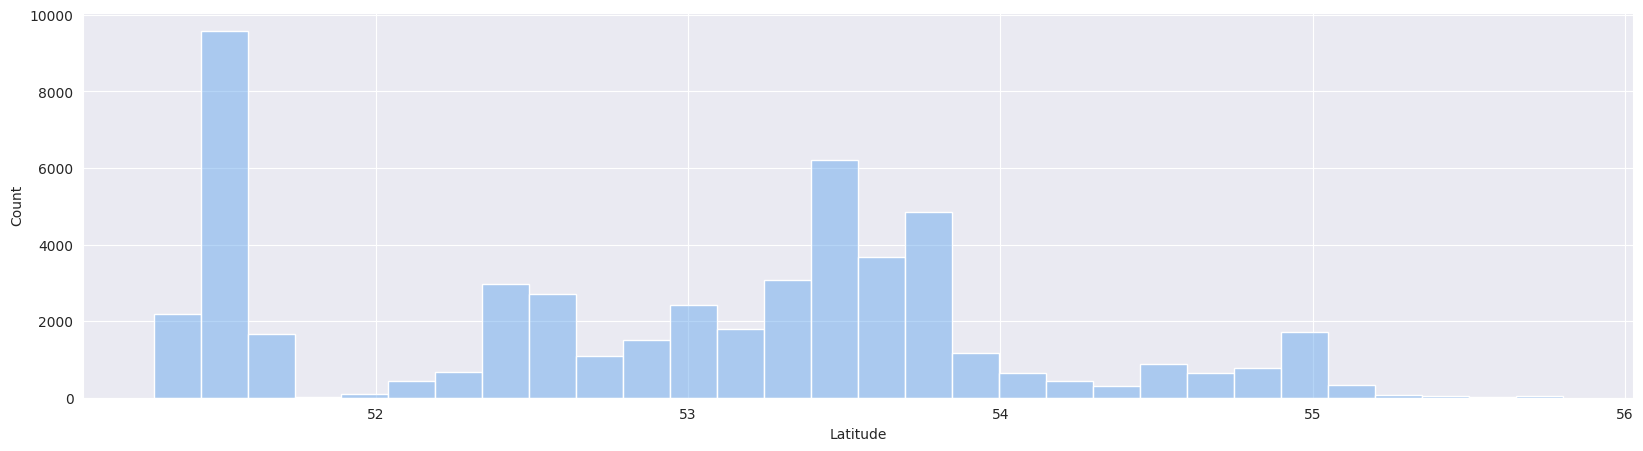

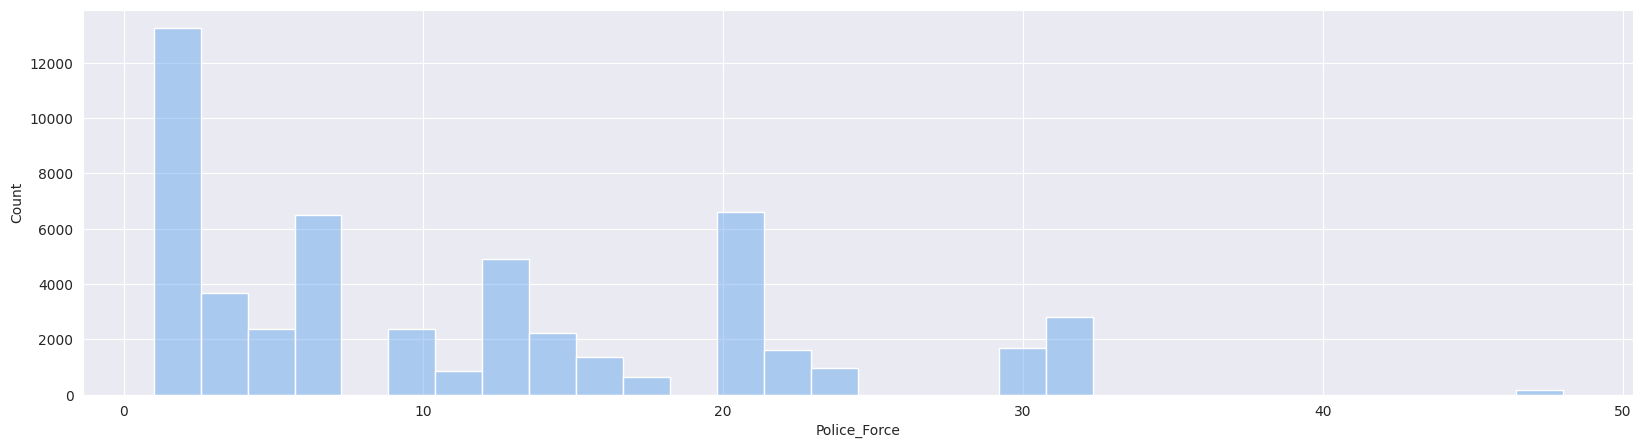

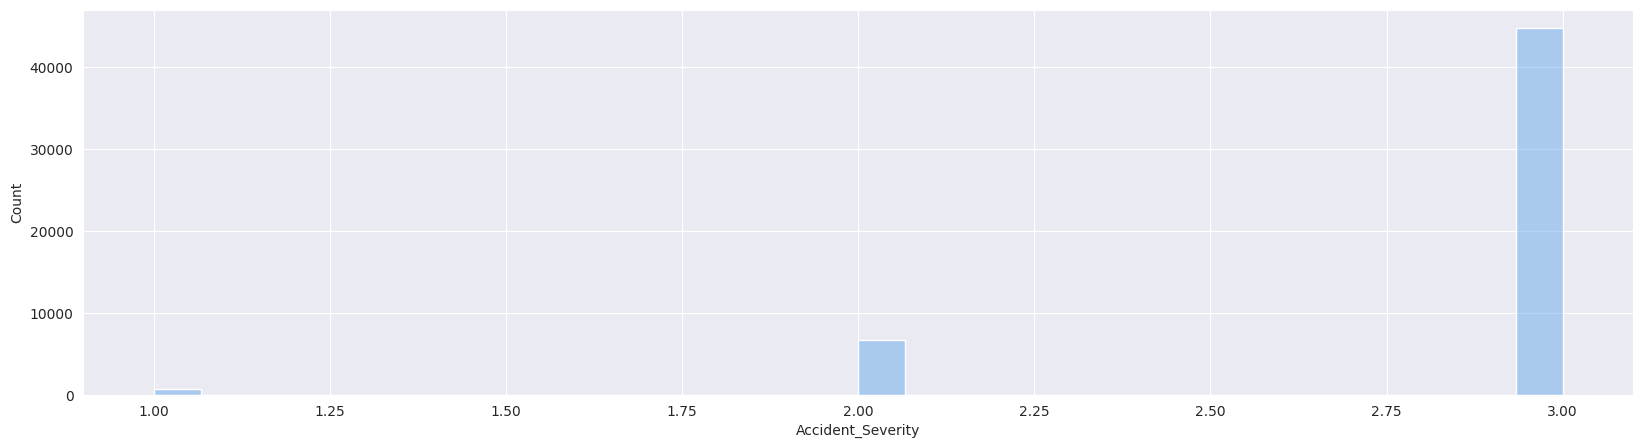

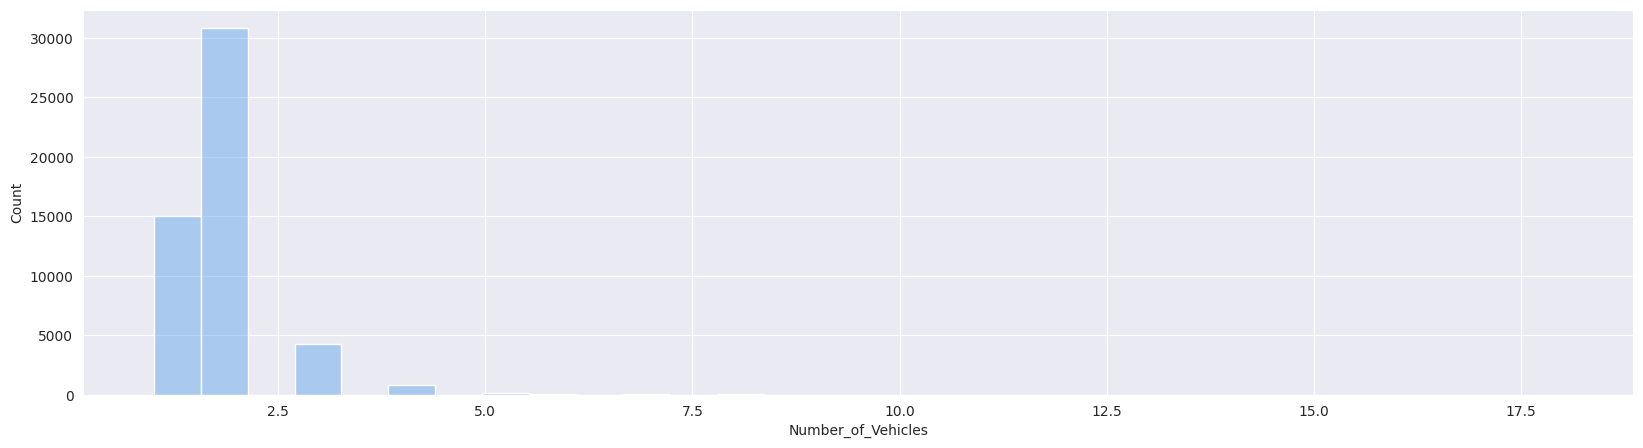

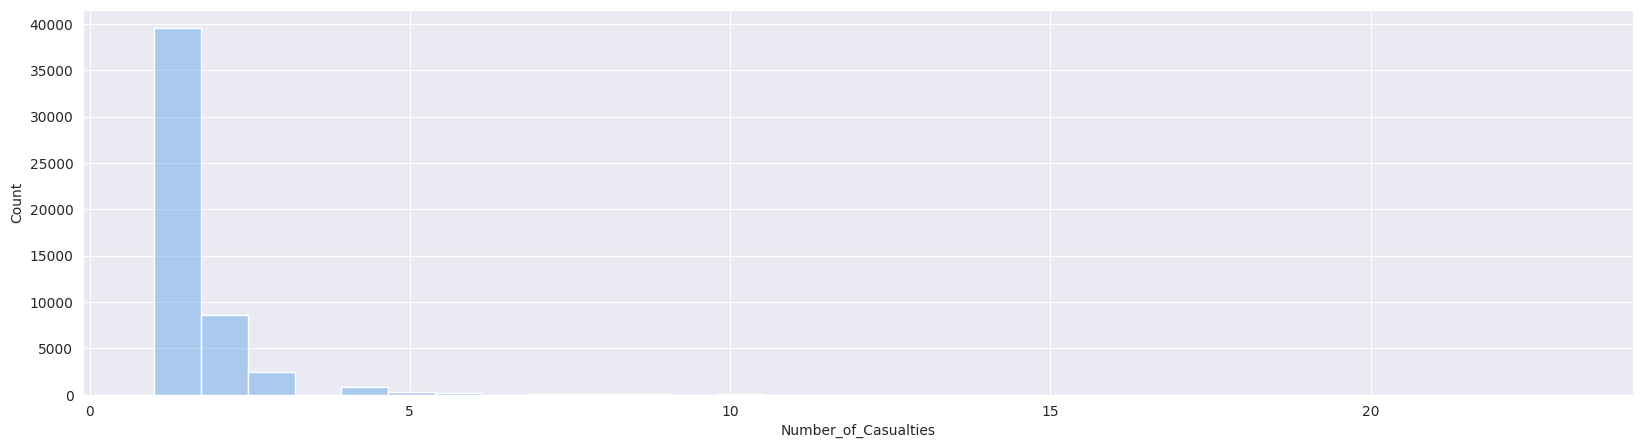

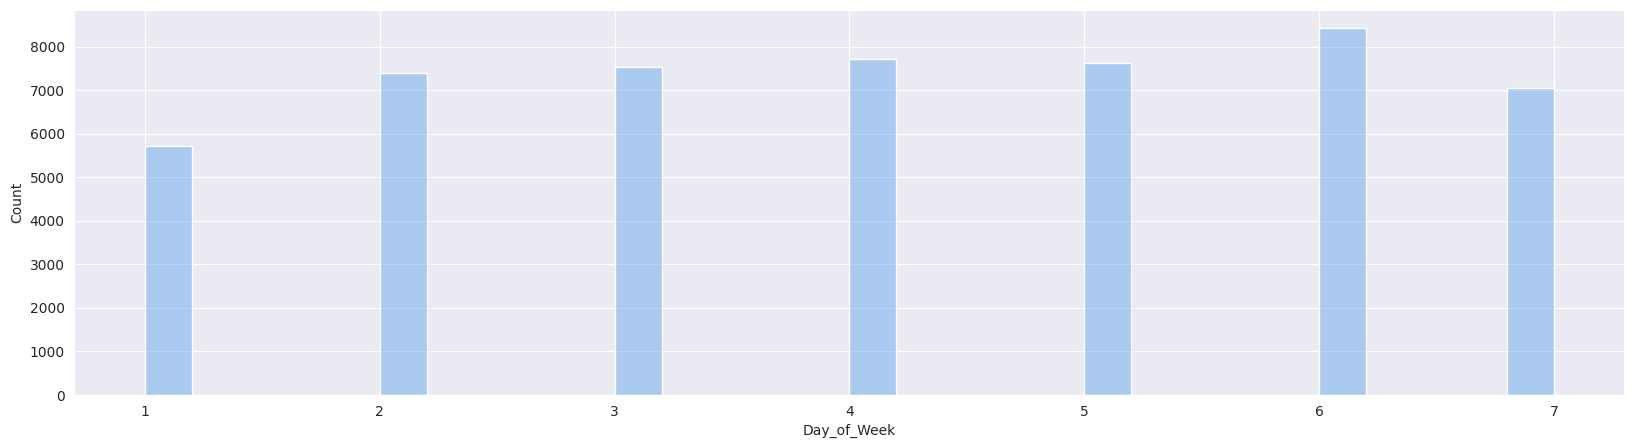

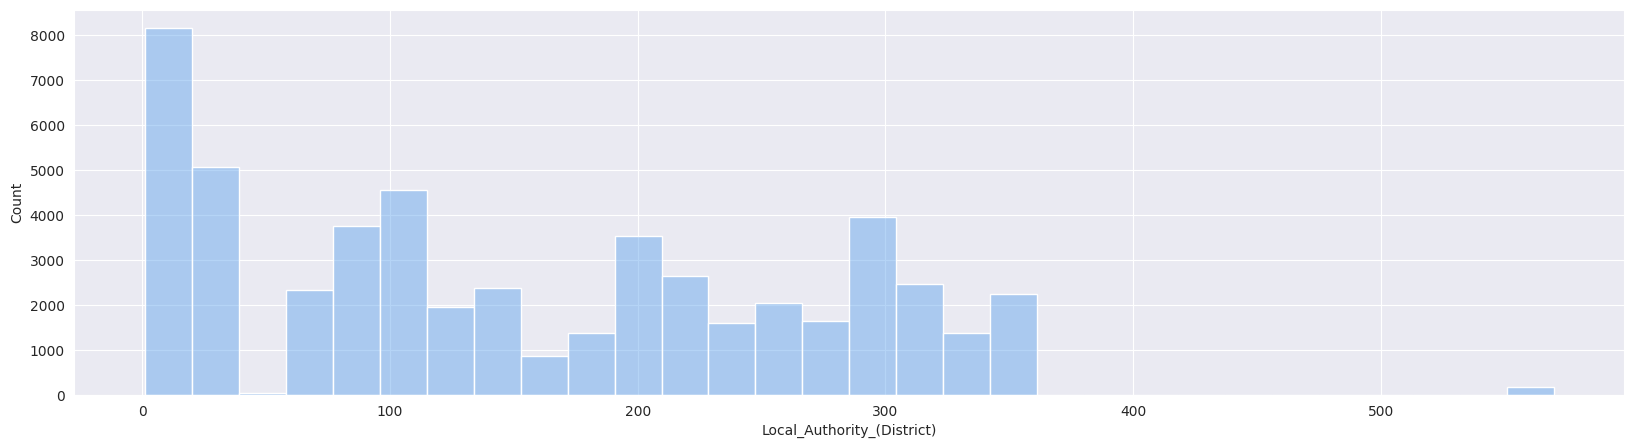

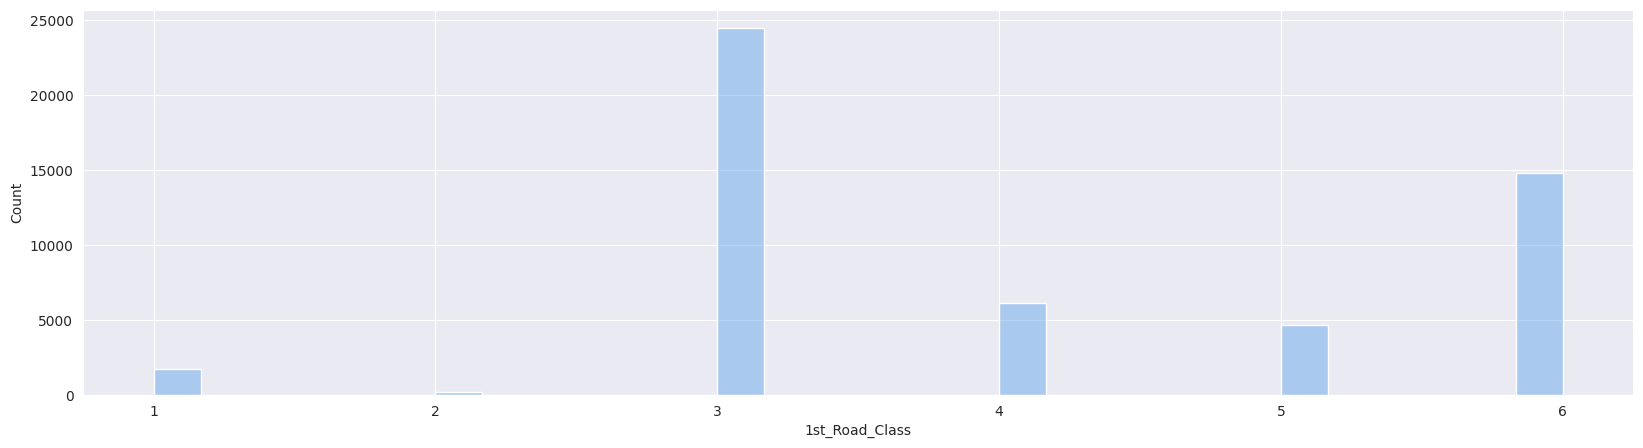

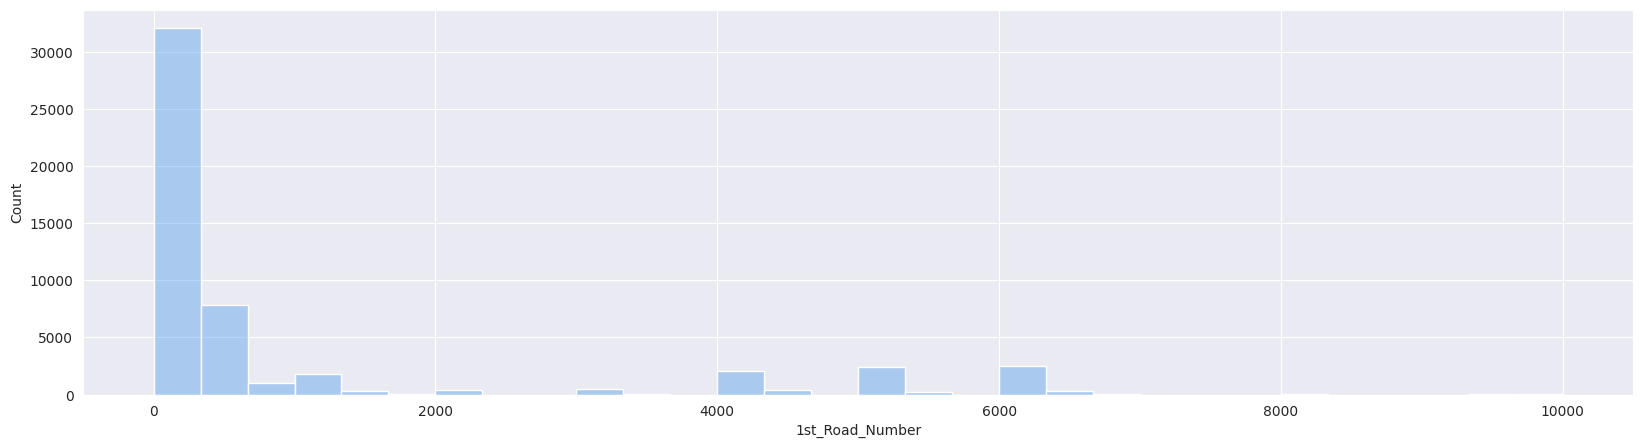

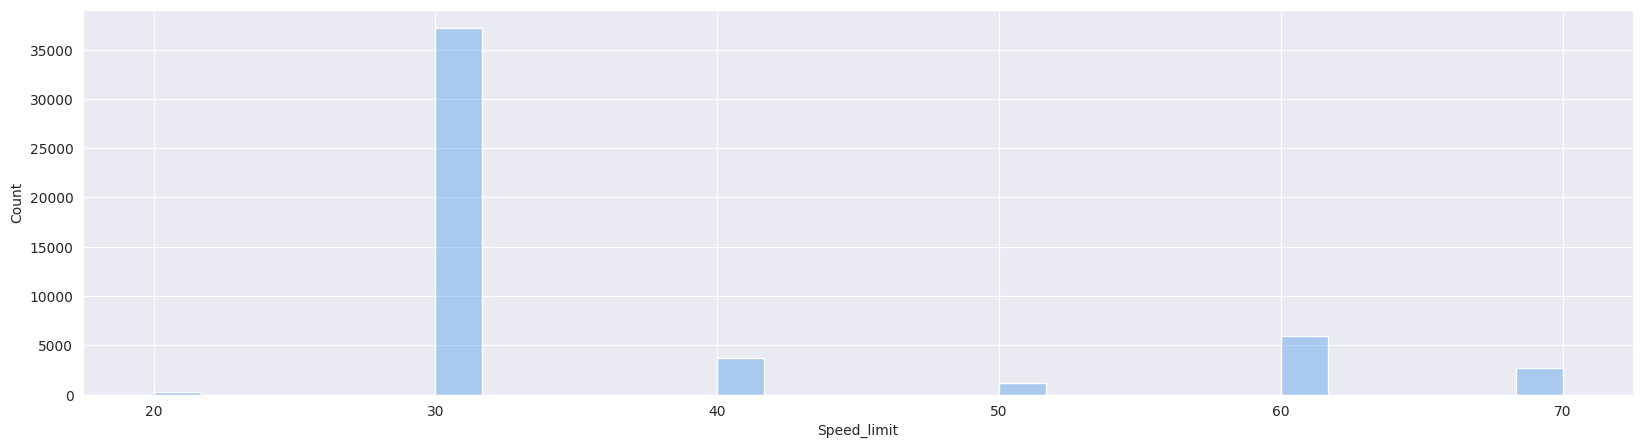

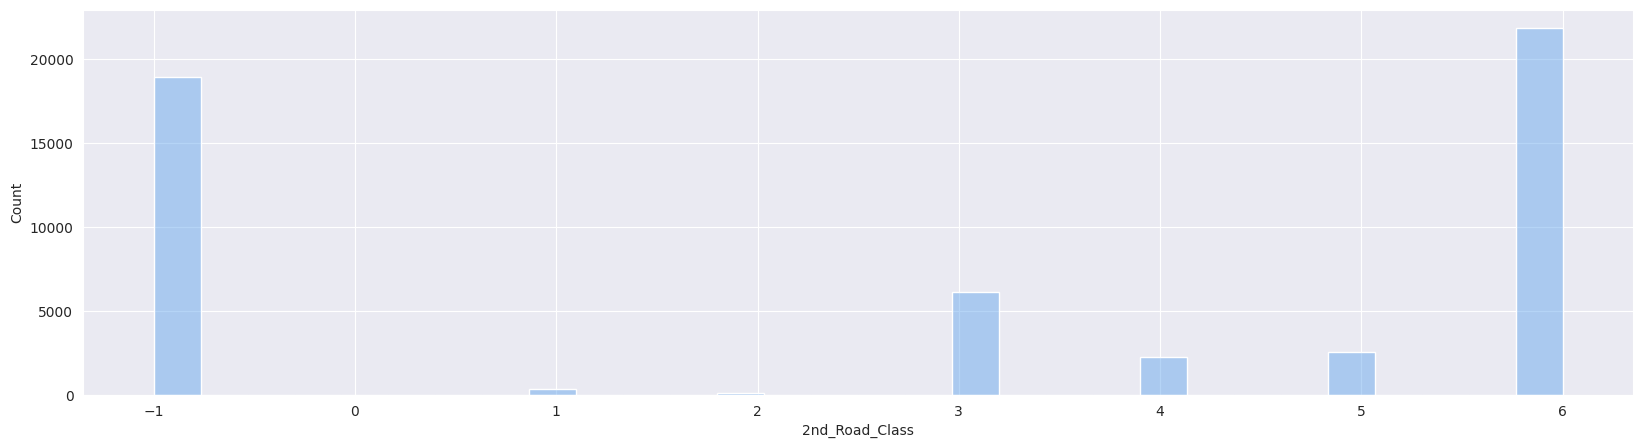

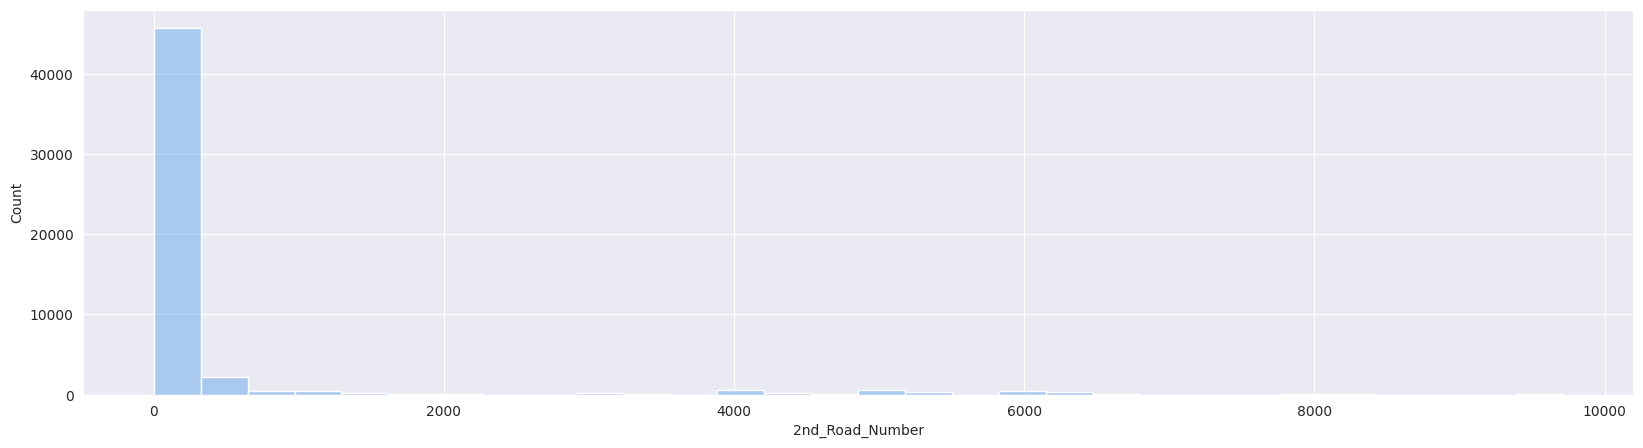

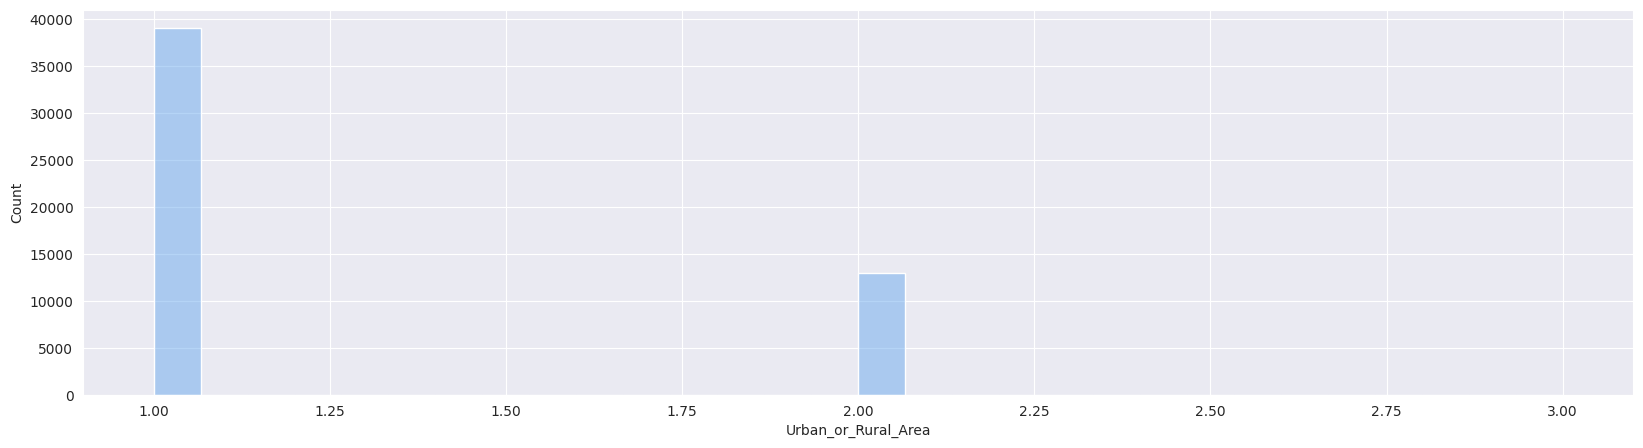

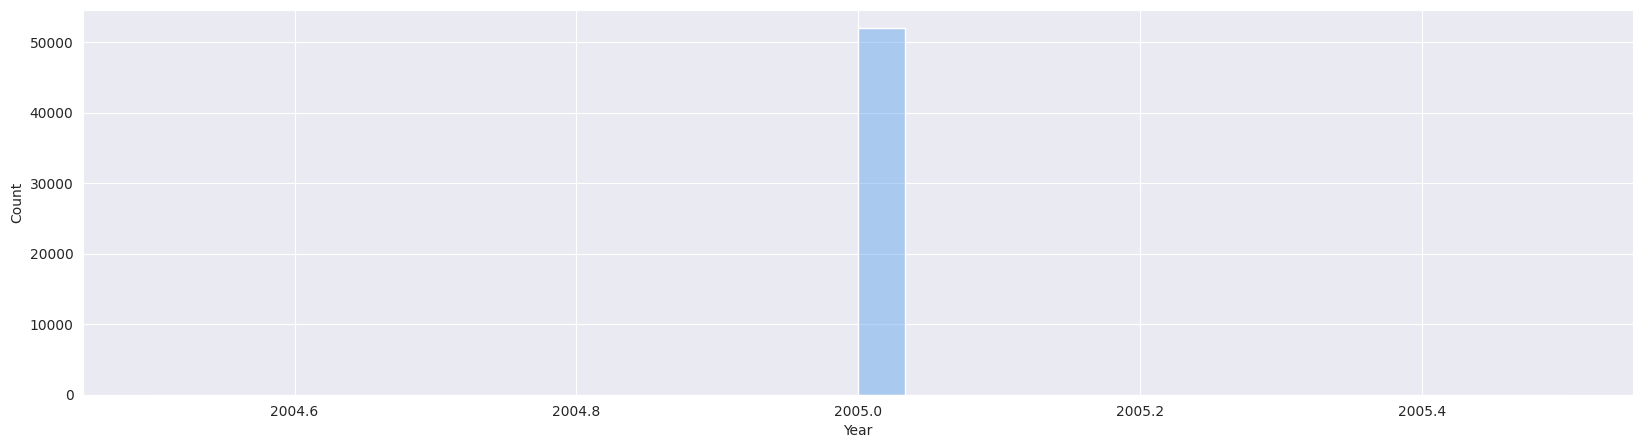

In [20]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize = (20,5))
  #bins = np.arange(df[col].min(),df[col].max()+1 , 1)
  sns.histplot(
      df[col],
      kde= False ,
      #hist_kws ={'alpha':1},
      color = '#6caaee' ,
      edgecolor ='white',
      bins =30 ,
      alpha = 0.5
  )
  plt.show()

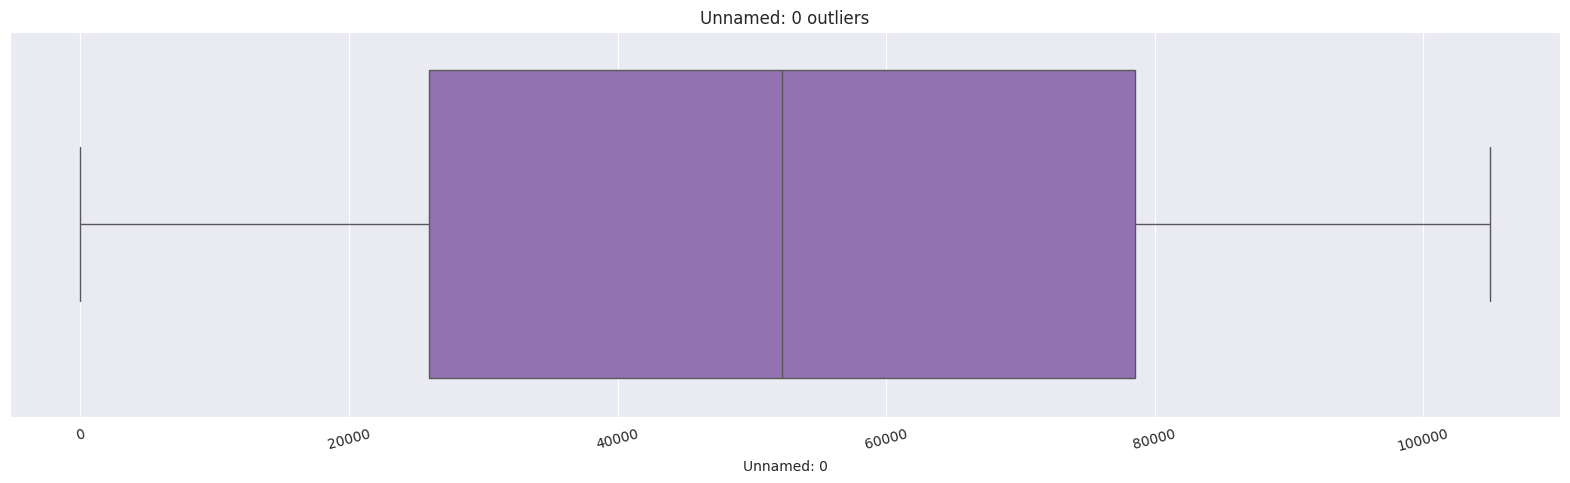

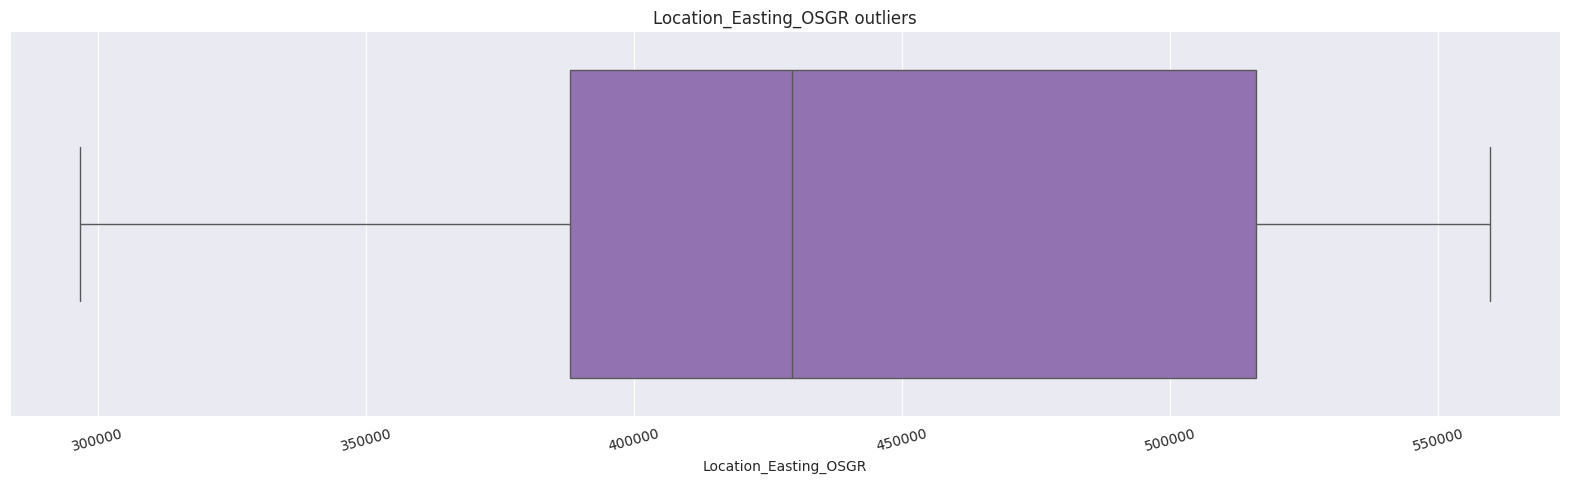

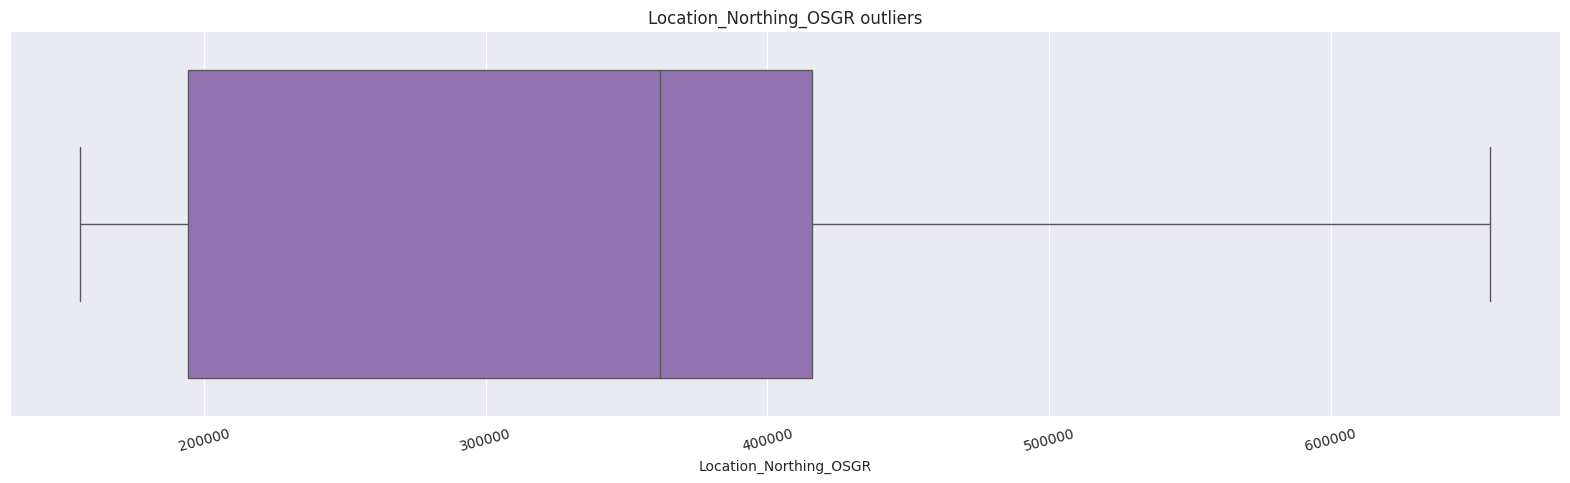

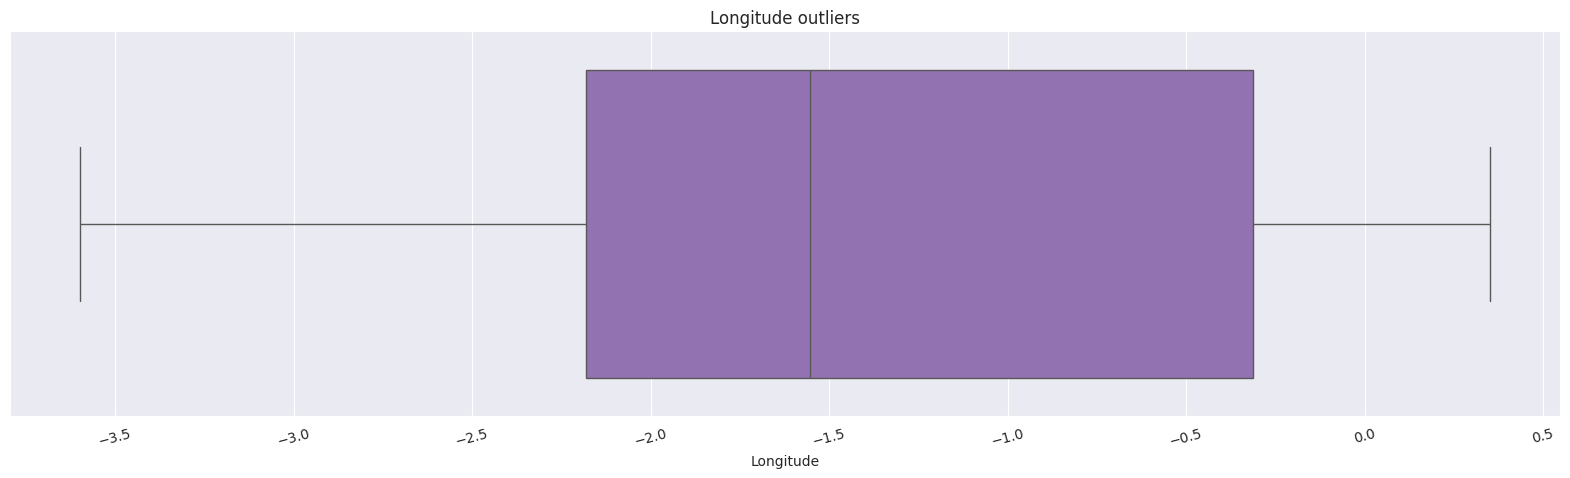

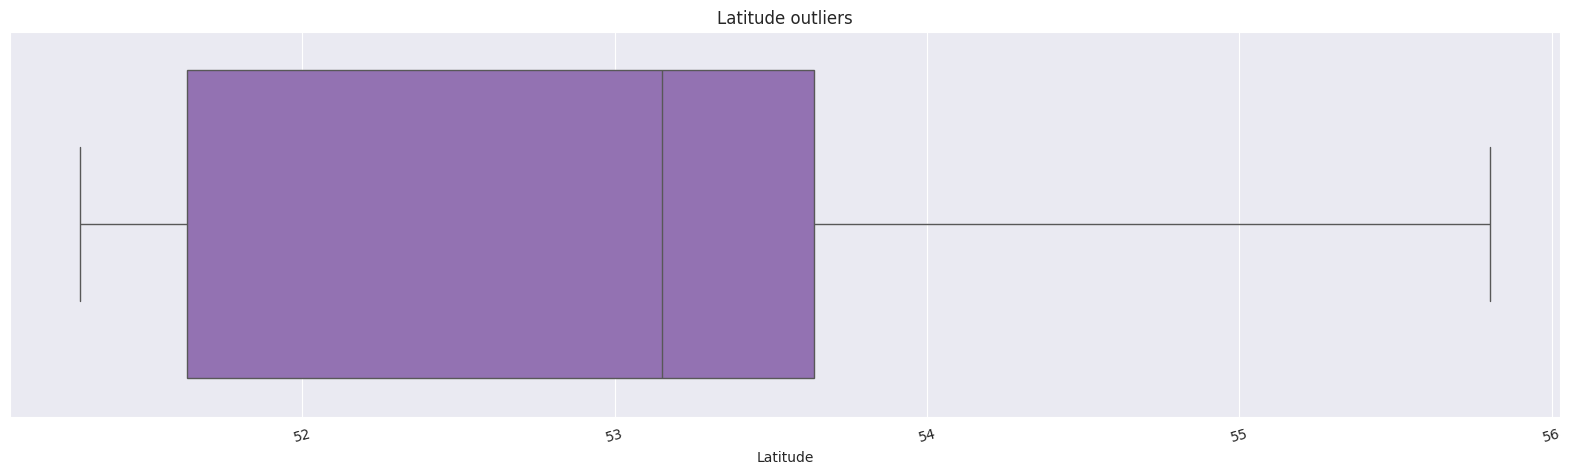

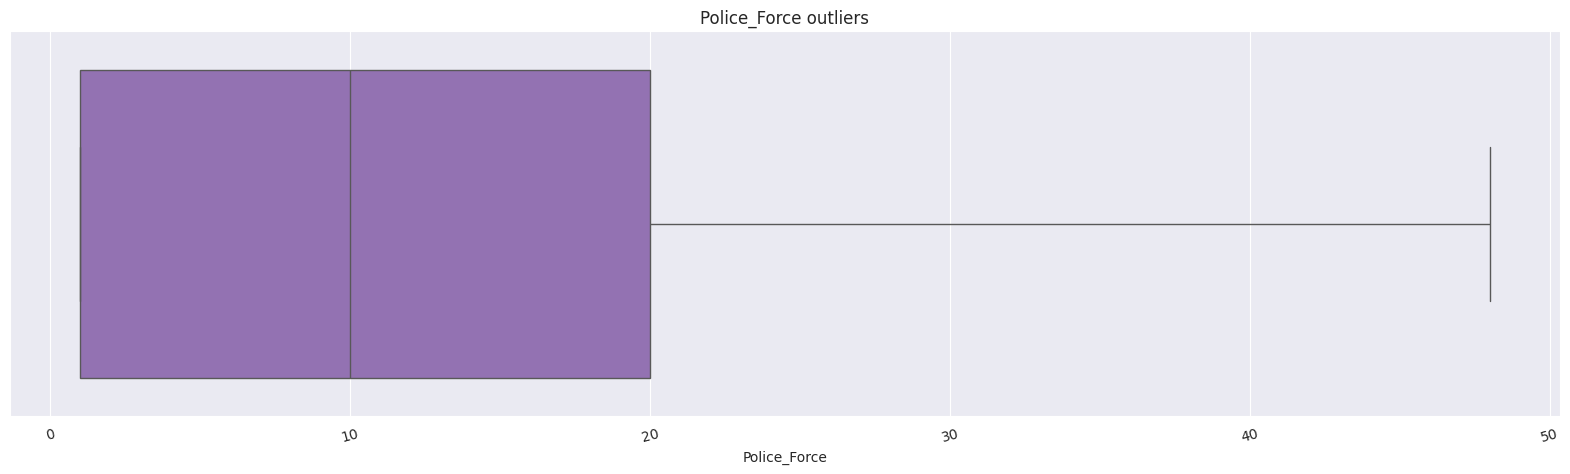

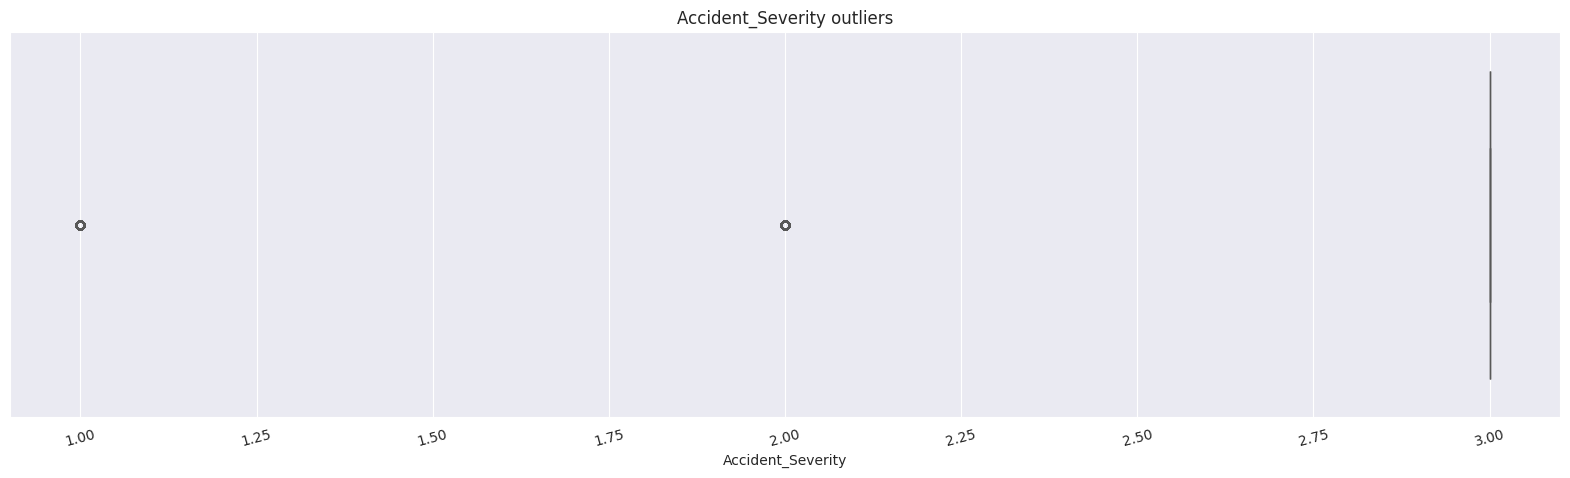

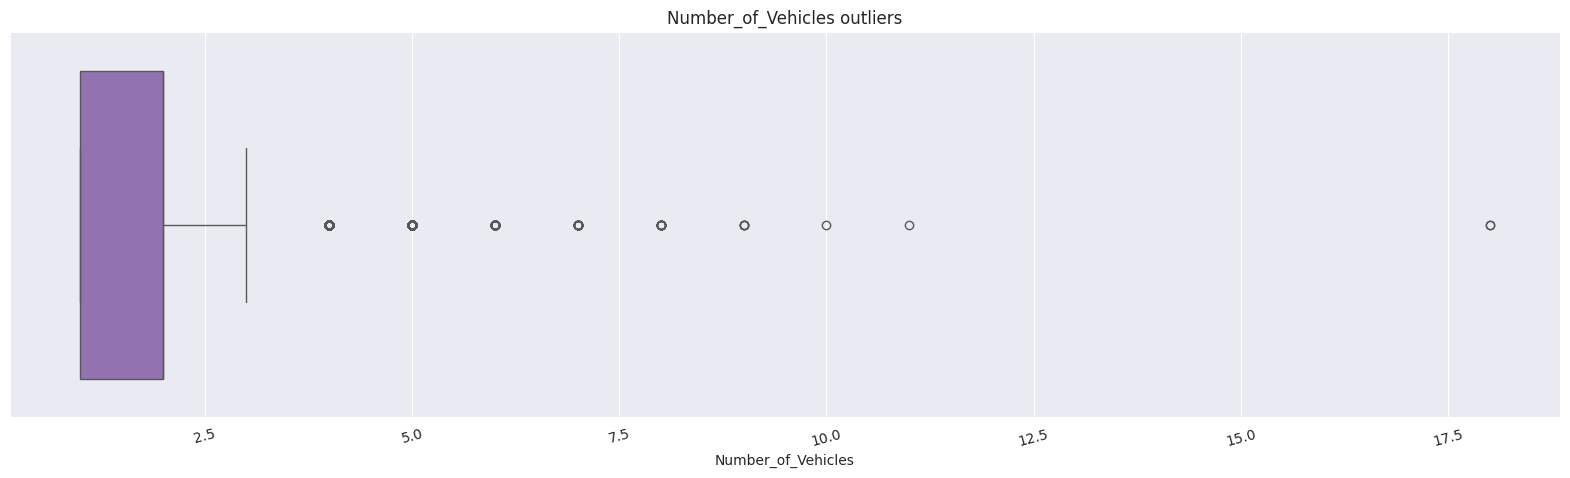

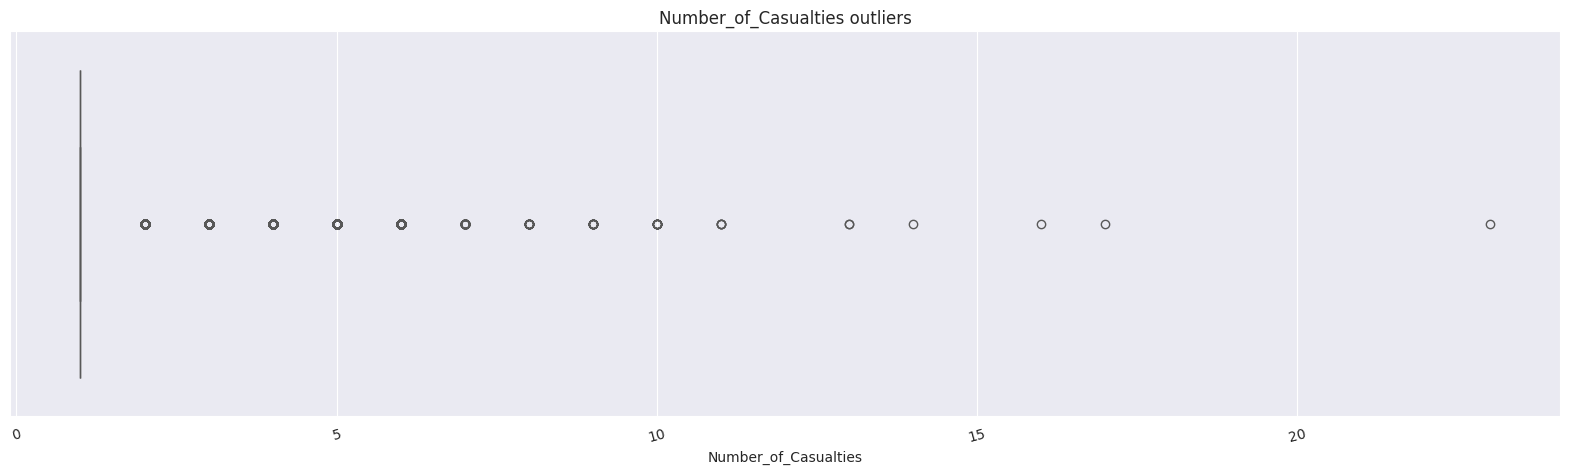

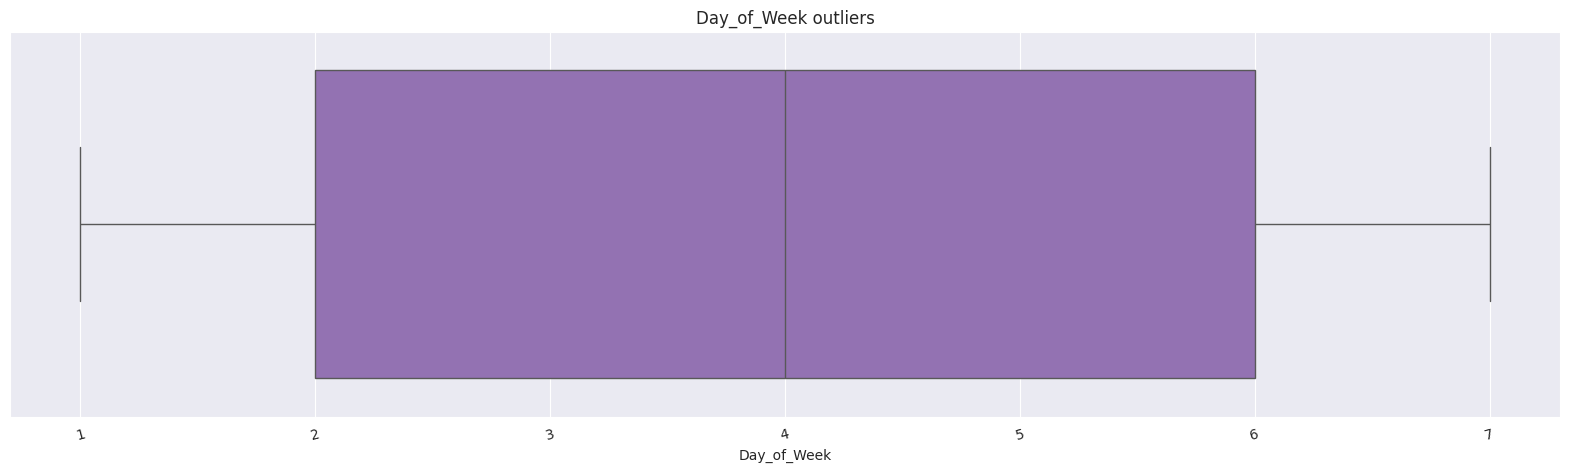

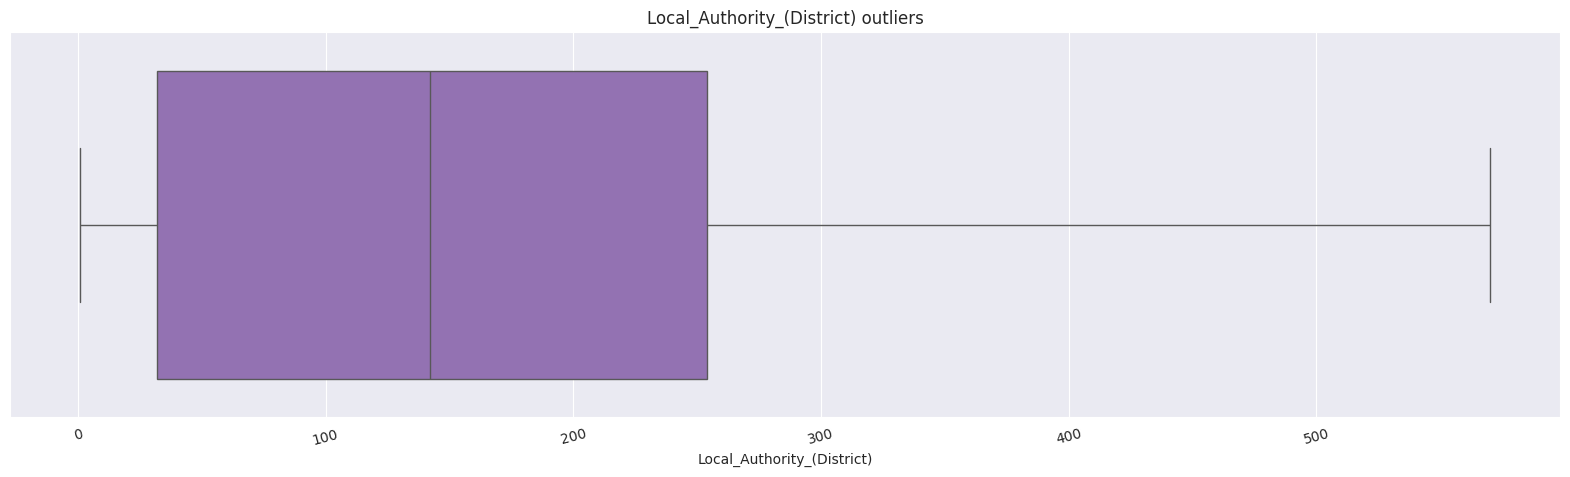

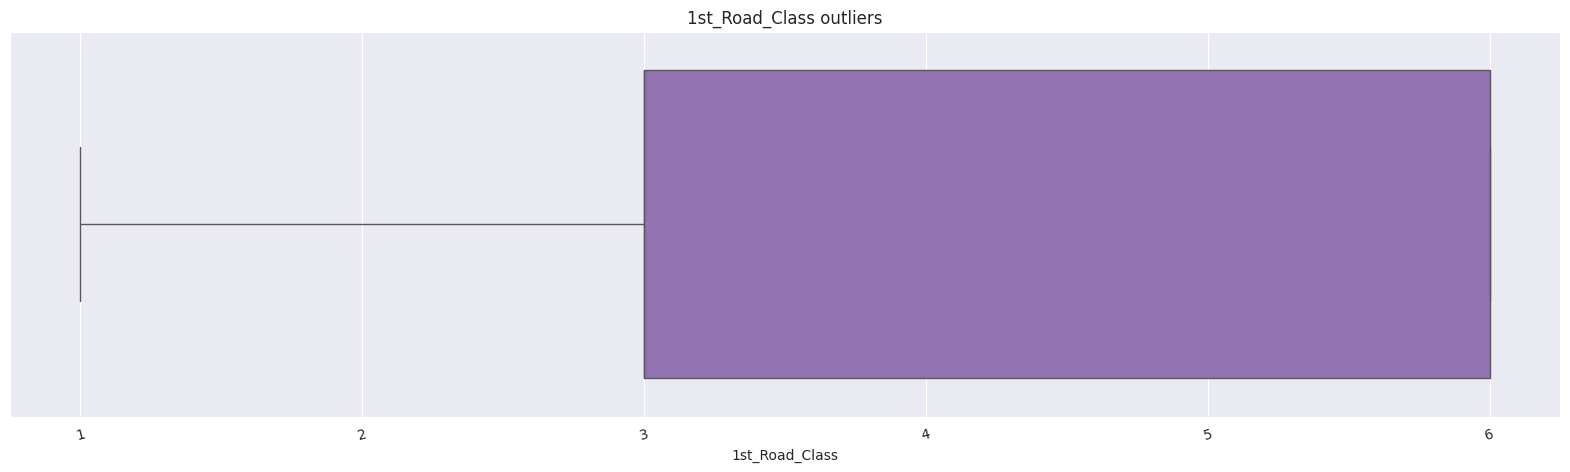

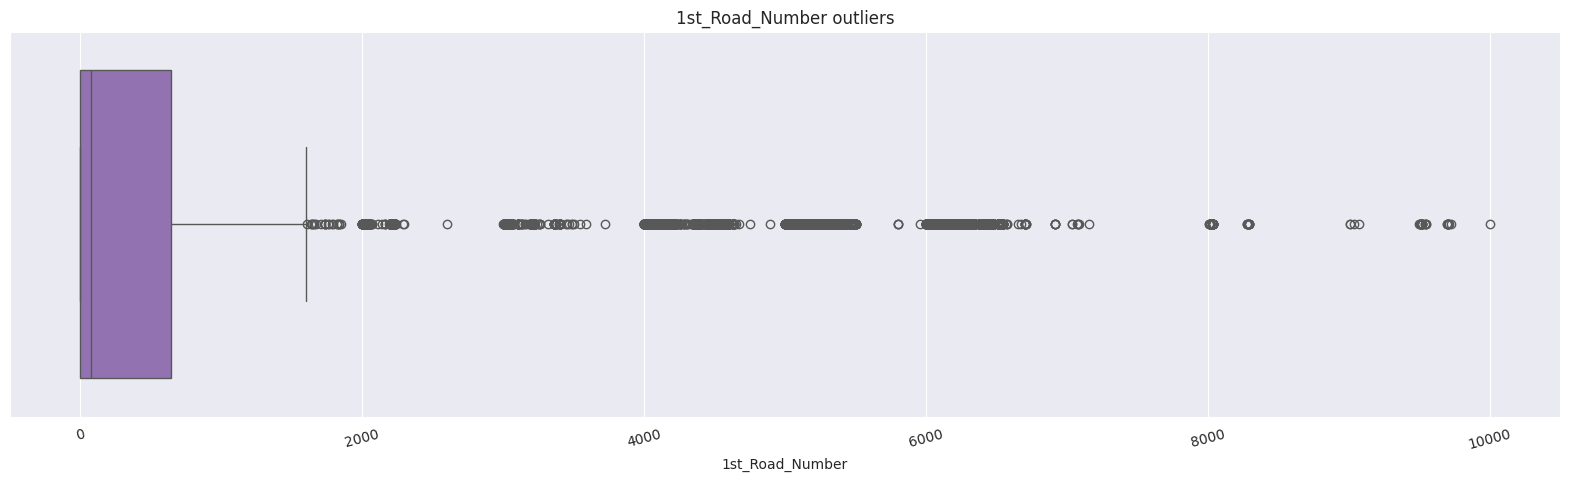

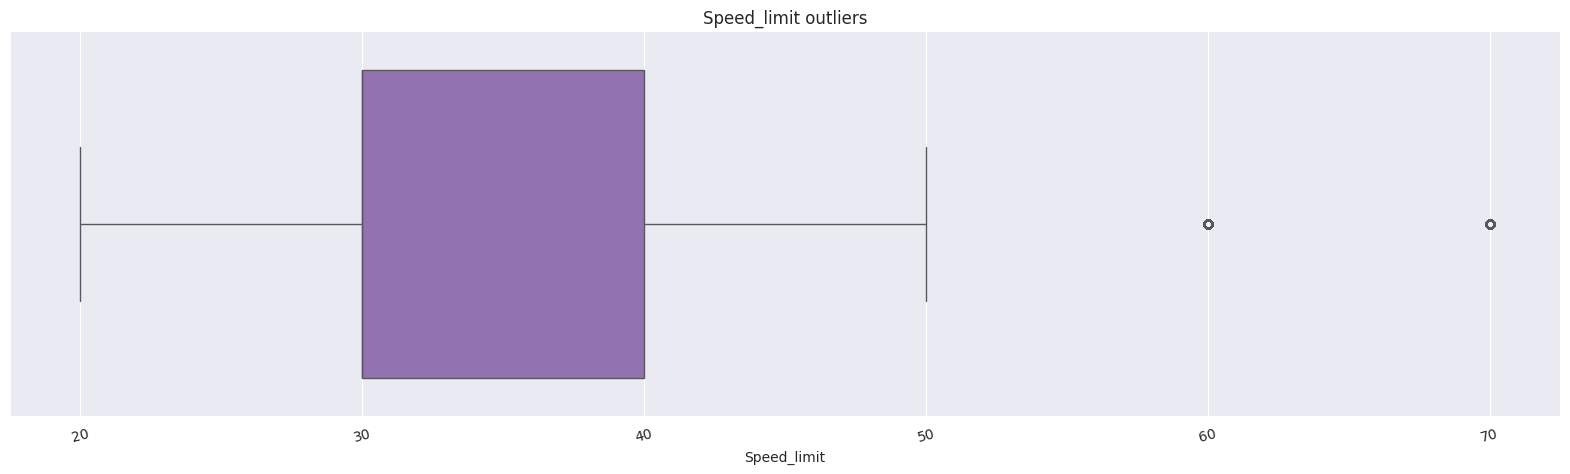

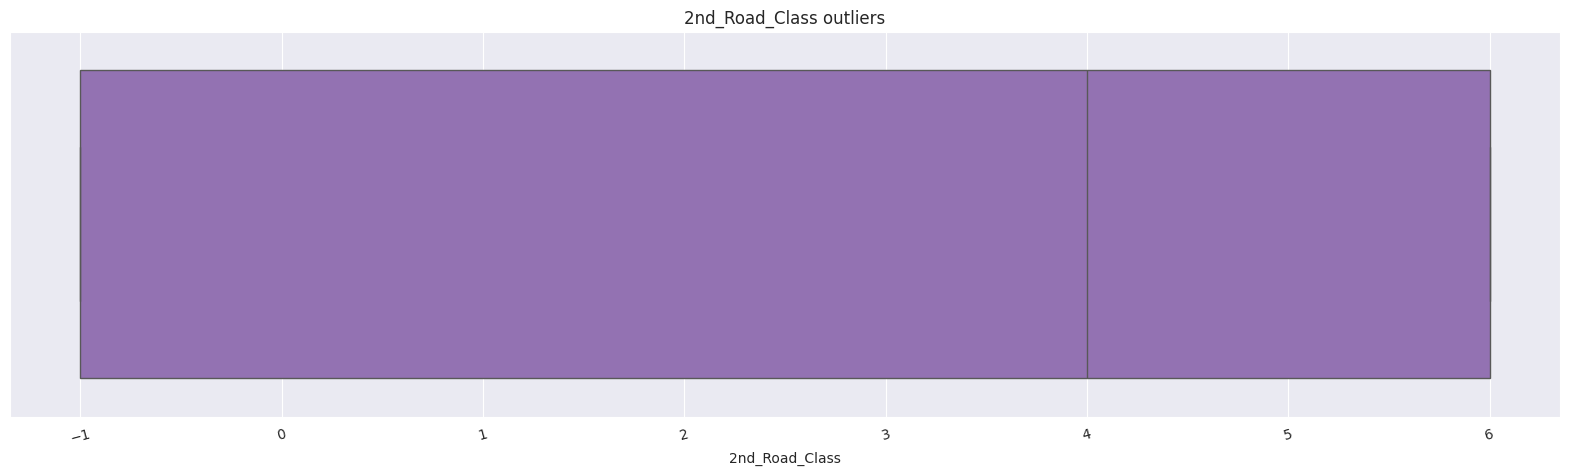

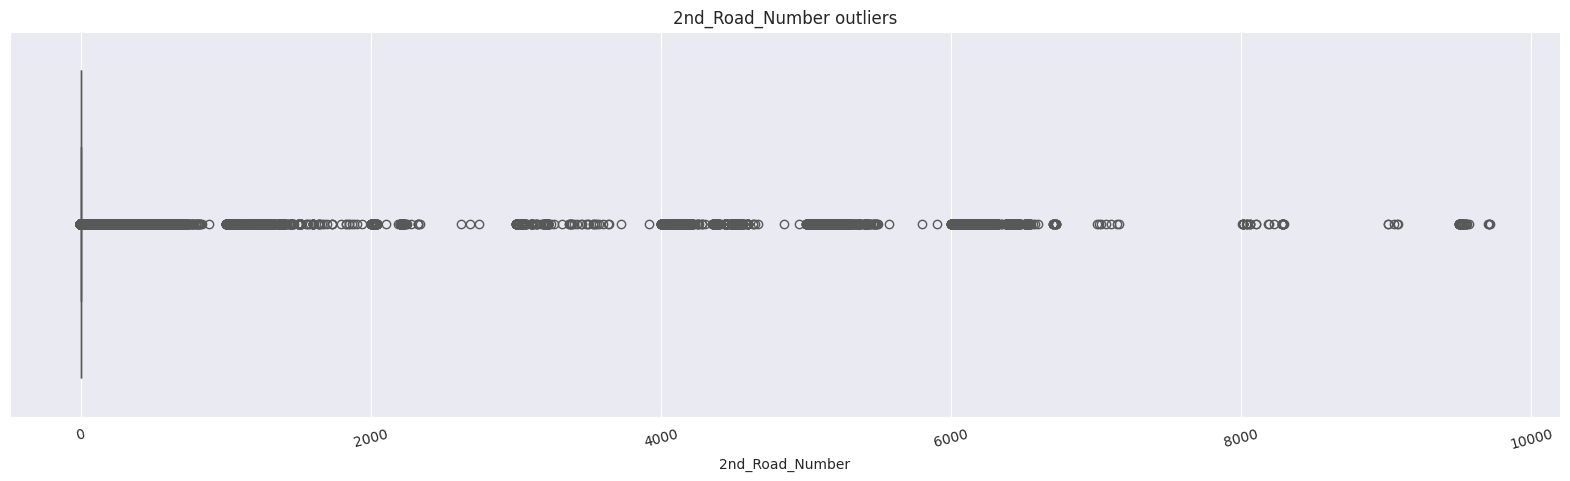

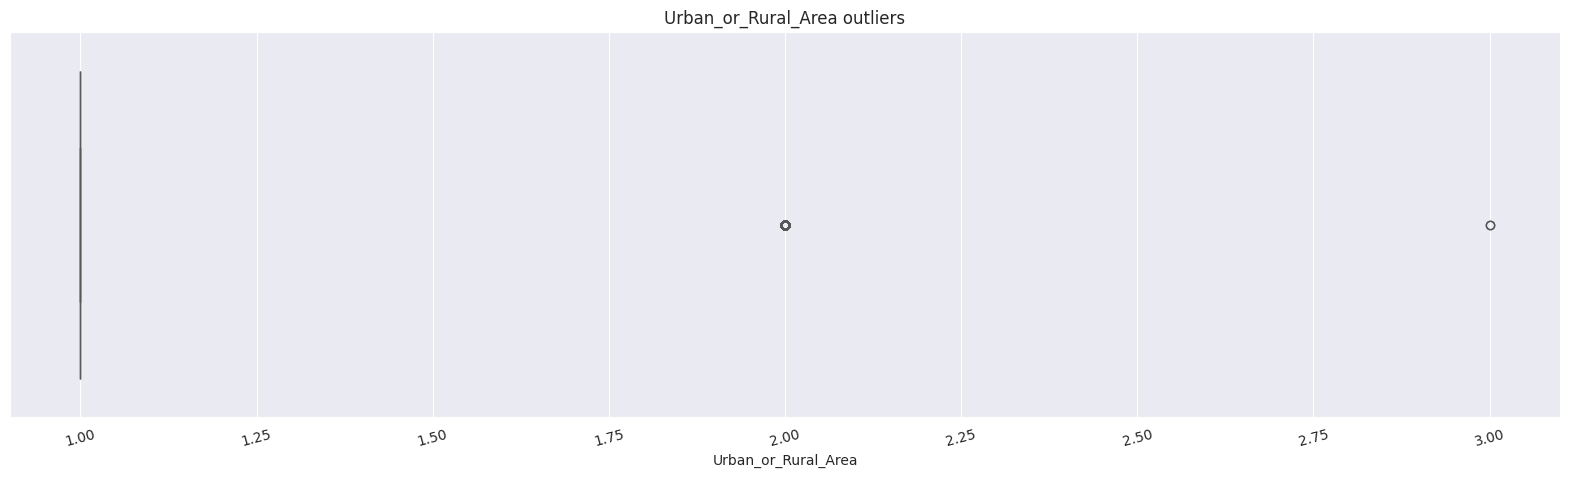

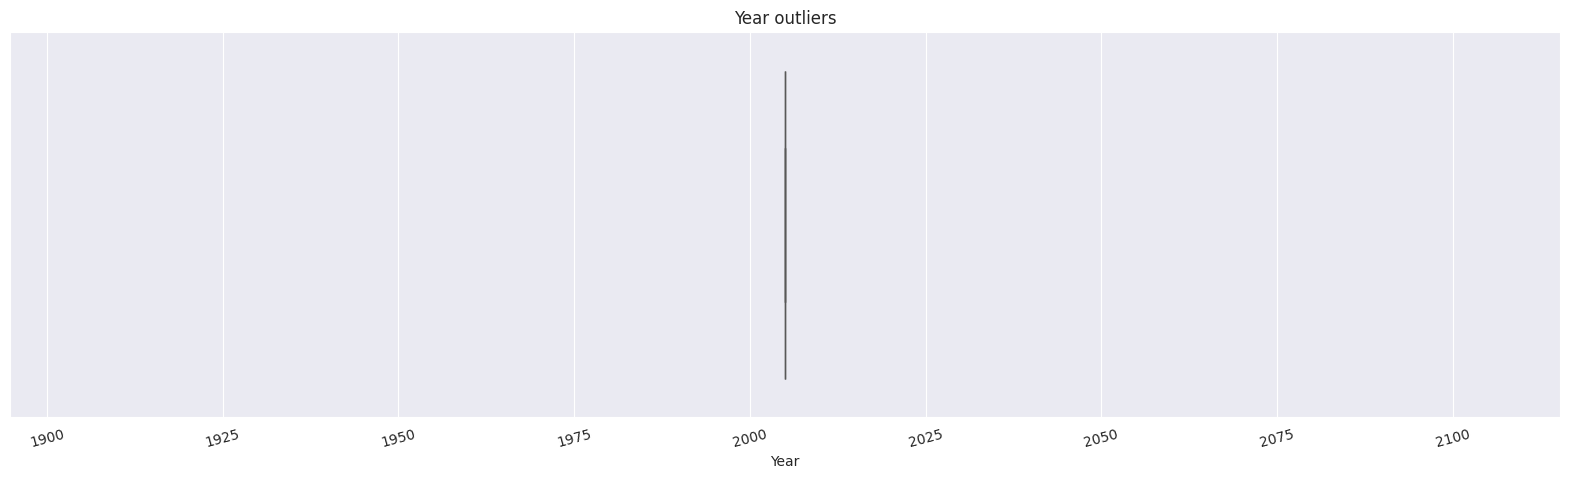

In [21]:
for col in df.select_dtypes(include='number').columns:
  plt.figure(figsize=(20,5))
  sns.boxplot(
      x= df[col],
      color = sns.color_palette()[4]
  )
  plt.xticks(rotation=15)
  plt.title(f'{col} outliers')
  plt.show()

In [22]:
def dropping_outliers_IQR(column_name , df):
  Q1 = df[column_name].quantile(.25)
  Q3 = df[column_name].quantile(.75)
  IQR = Q3-Q1
  UPPER_LIMIT = Q3 + 1.5*IQR
  LOWER_LIMIT = Q1 - 1.5*IQR
  new_column = df.loc[(df[column_name] >= LOWER_LIMIT) & (df[column_name] <= UPPER_LIMIT)]
  return new_column

In [23]:
#removing outliers :
for  col in df.drop(columns = ['Accident_Severity']).select_dtypes(include = 'number').columns:
  df = dropping_outliers_IQR(col , df)

In [24]:
#imputing the data
#filling null categorical columns with mode
for col in ['LSOA_of_Accident_Location' , 'Pedestrian_Crossing-Physical_Facilities' , 'Pedestrian_Crossing-Human_Control']:
  df[col].fillna(df[col].mode()[0],axis = 0 ,inplace = True)

In [25]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [26]:
#Scaling numerical columns with standard scaler , since its best for KMeans Algorithm
numerical = df.drop(columns = ['Accident_Severity']).select_dtypes(include='number').columns
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

In [27]:
#labeling categorical features with oneHotEncoding
encoder = OneHotEncoder(sparse=False)
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[[col]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


<Axes: >

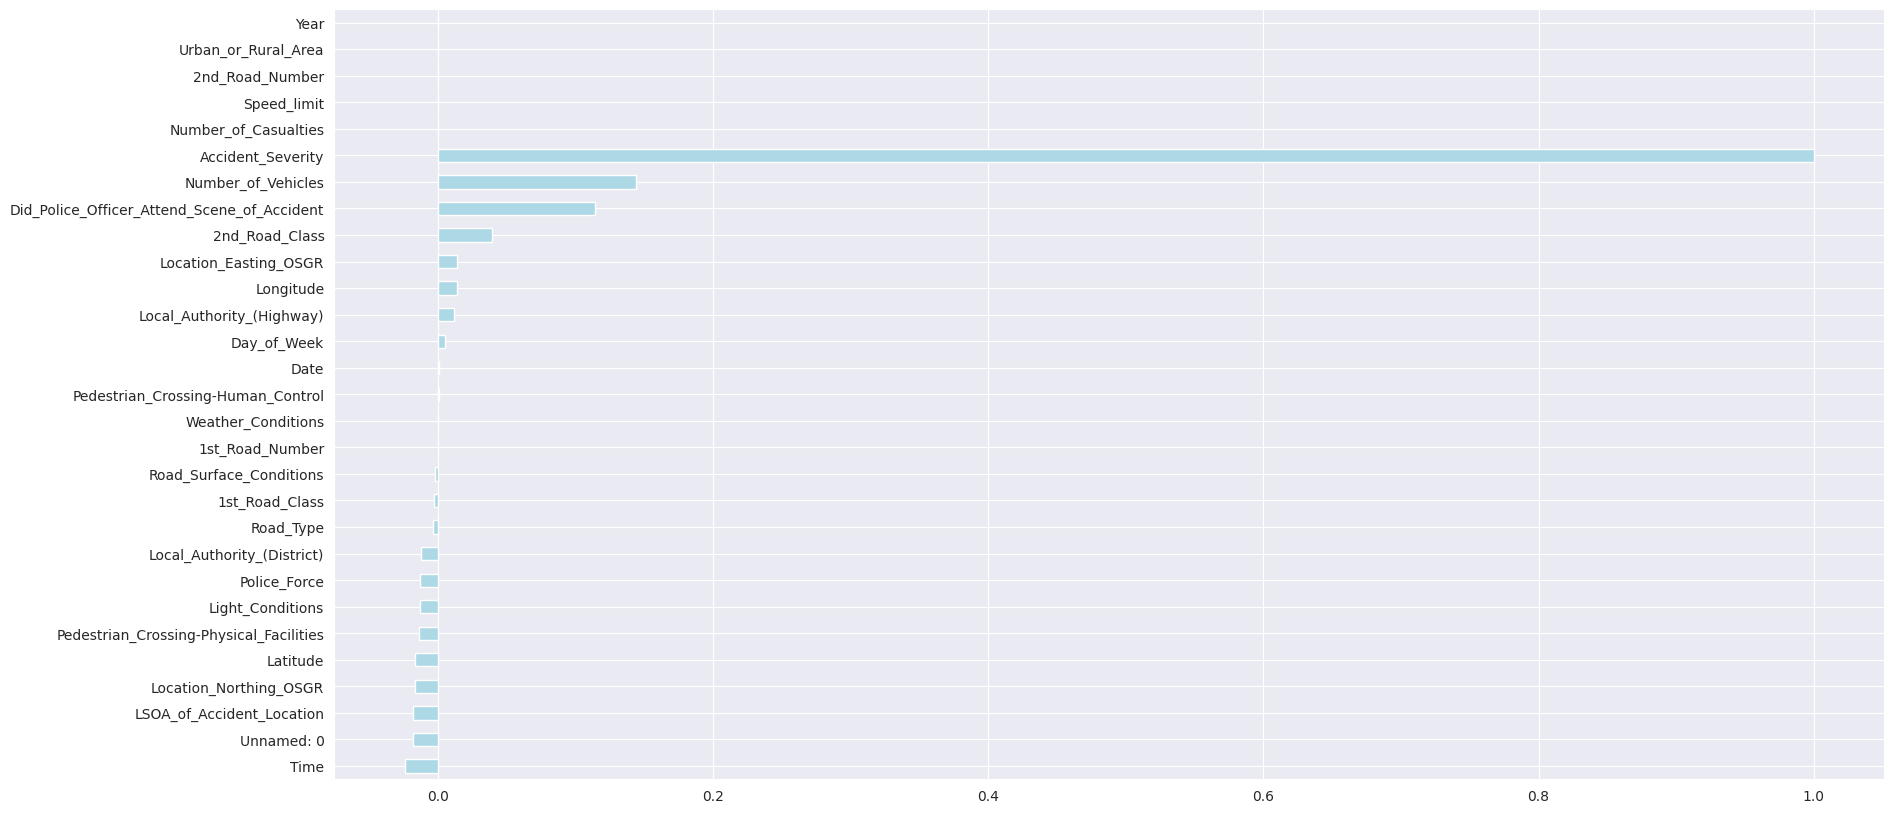

In [28]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
plt.figure(figsize = (20,10))
corr= df.drop(columns=['Accident_Index']).corr(numeric_only=True)
corr['Accident_Severity'].sort_values().plot.barh(color='lightblue')

In [29]:
selected_features =['Number_of_Vehicles','Did_Police_Officer_Attend_Scene_of_Accident','2nd_Road_Class','Time','LSOA_of_Accident_Location',
                               'Location_Northing_OSGR', 'Longitude', 'Latitude','Police_Force',
                               'Accident_Severity','Local_Authority_(District)',
                               'Local_Authority_(Highway)','Light_Conditions','Day_of_Week']

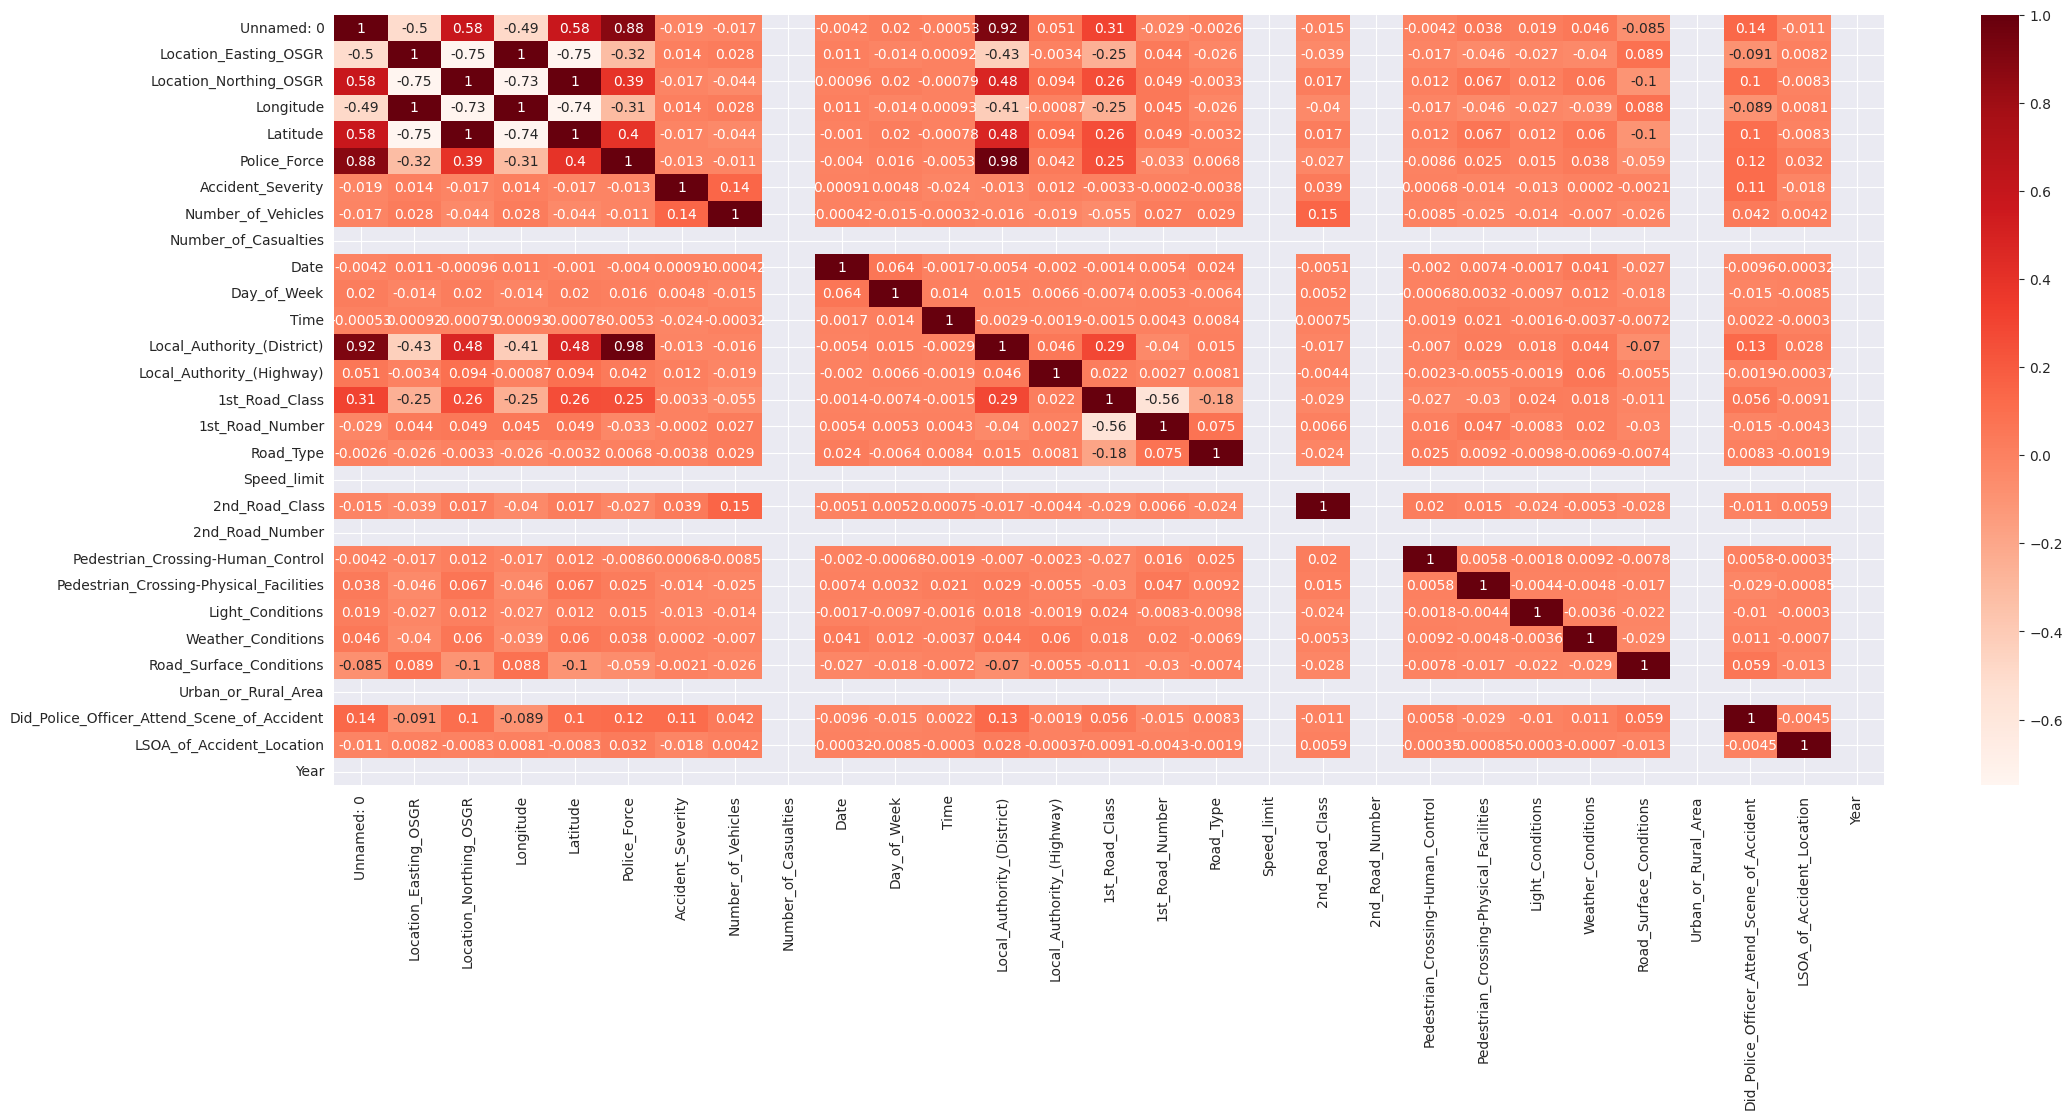

In [30]:
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
df.drop(columns=['Year','Date','Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)'],inplace = True)

In [32]:
#performing PCA for Feature extraction:
def do_pca(n_components, data):
    #X = StandardScaler().fit_transform(data)
    pca = PCA(n_components)
    X_pca = pca.fit_transform(data)
    return pca, X_pca

In [33]:
#df.drop(columns=['Year','Date','Location_Easting_OSGR','Location_Northing_OSGR','Local_Authority_(District)','Road_Type'
#, 'Time'  ],inplace = True)
pca , df_pca = do_pca( 4 , df)

In [34]:
df_pca.shape

(17494, 4)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

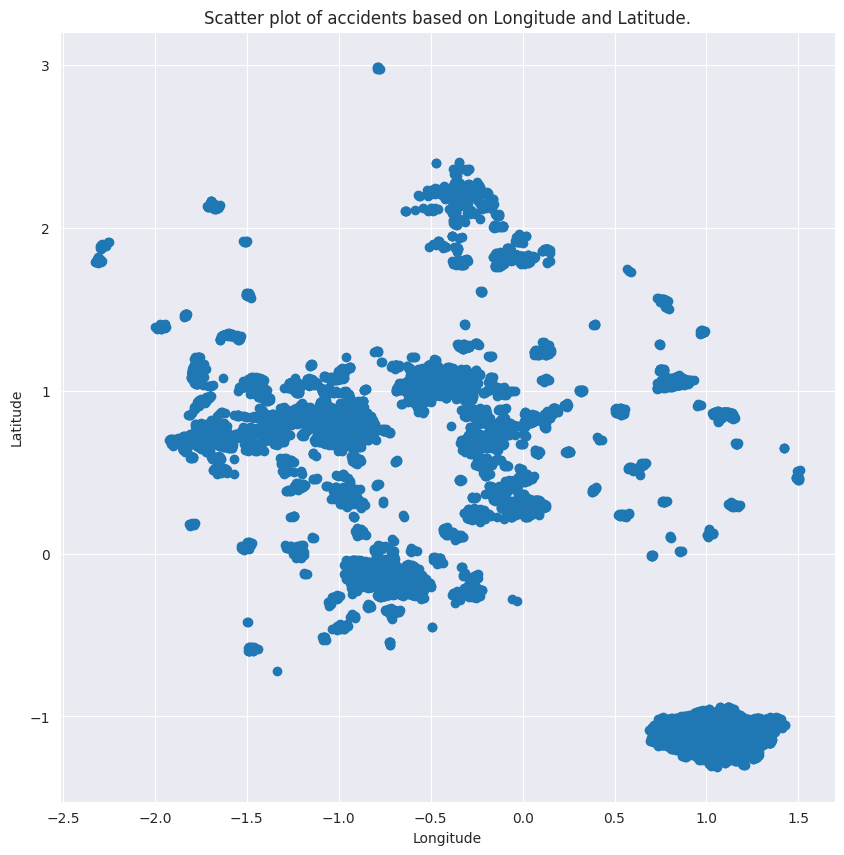

In [35]:
plt.figure(figsize=(10,10))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter plot of accidents based on Longitude and Latitude.')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

Text(0, 0.5, 'Average distance from Centroid')

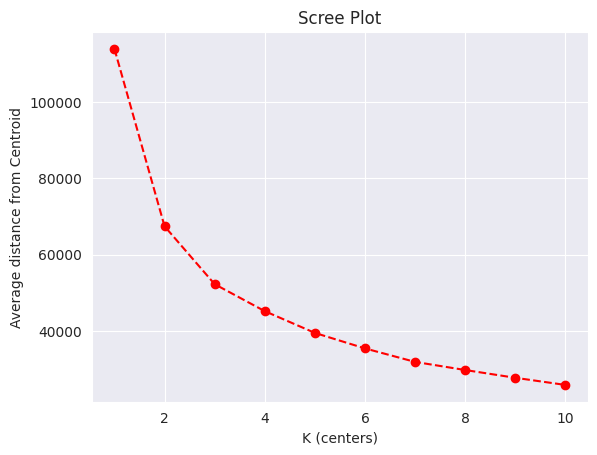

In [36]:
scores =[]

for center in range(1,11):
    kmeans =KMeans(center)
    model = kmeans.fit(df_pca)
    scores.append(abs(model.score(df_pca)))

centers = list(range(1,11))
plt.plot(centers,scores , linestyle='--', marker='o', color='r')
plt.title('Scree Plot')
plt.xlabel('K (centers)')
plt.ylabel('Average distance from Centroid')

In [37]:
def fit_kmeans(data, centers):

    kmeans = KMeans(centers)
    labels = kmeans.fit_predict(data)
    return labels

labels = fit_kmeans(df_pca, 3) #fit kmeans to get the labels

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [38]:
x = df
y = df['Accident_Severity']

In [39]:
correct_labels = sum(y == labels)

print("%d out of %d samples correctly labeled." % (correct_labels, y.size))
print('Accuracy: {0:0.2f}'. format(correct_labels/float(y.size)))

992 out of 17494 samples correctly labeled.
Accuracy: 0.06


## Plot the data points with their predicted cluster center

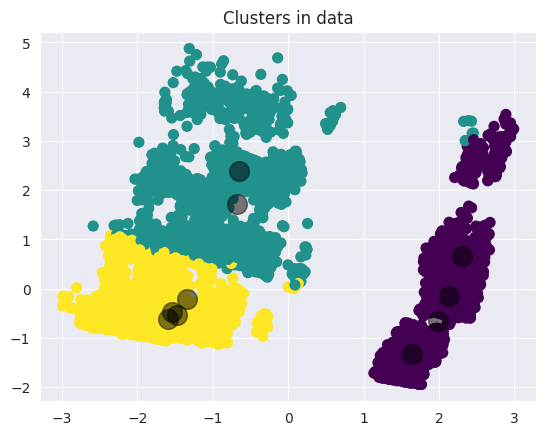

In [40]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.title('Clusters in data')
plt.show()

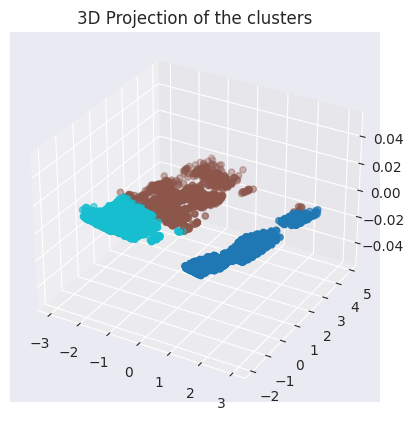

In [41]:
fig = plt.figure();
ax = fig.add_subplot(projection='3d')
ax.scatter(df_pca[:, 0],
           df_pca[:, 1],
           c=labels,
           cmap='tab10')
plt.title('3D Projection of the clusters')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

## Exam Questions
* **Justify Your Feature Selection:**

   - Which features did you choose for clustering and why?

       ***I Have used the features that highly collerates with the 'Accident_Severity'column,
       as I think it suits the clustering requirements. I have also plotted the correlation matrix to see what are the 2 features strongly correlated to delete one of them (mimicking PCA), such as longitude and location easting.***

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
       ***I Have used the elbow method for this task and reached to 3 clusters.***

* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?

     ***I have compared the points actual accidents severity with the points in the predicted clusters, it showed me how well the data grouped into the clusters as well as the accuracy of the clustering***

* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

     ***DBSCAN Would be my next choice to see how the data acts, since DBSCAN is robust to outliers and noise and KMeans is not. I would also use
     VarianceThreshold for feature selection to see the difference***